In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from warnings import simplefilter


In [7]:
plt.style.use("Solarize_Light2")
simplefilter("ignore")

In [8]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [9]:
dta = sm.datasets.sunspots.load_pandas().data
dta

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


<Axes: >

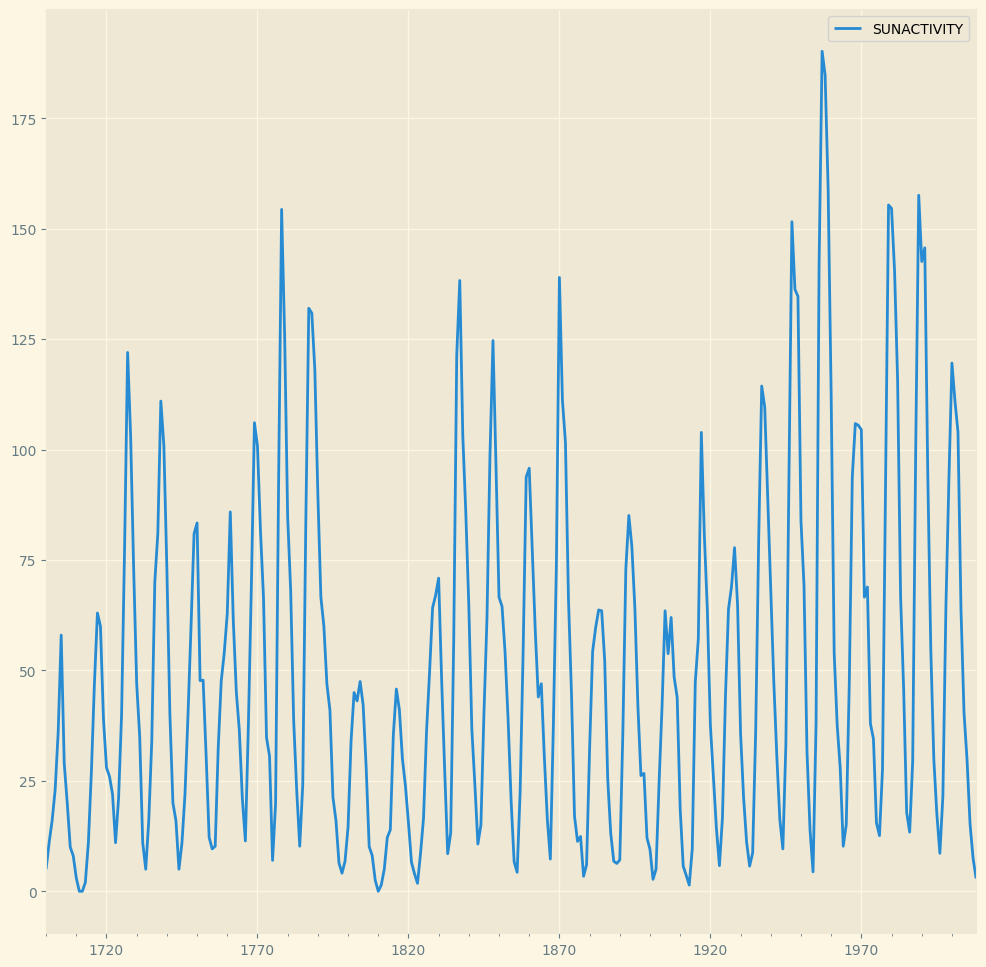

In [16]:
dta.plot(figsize = (12,12))

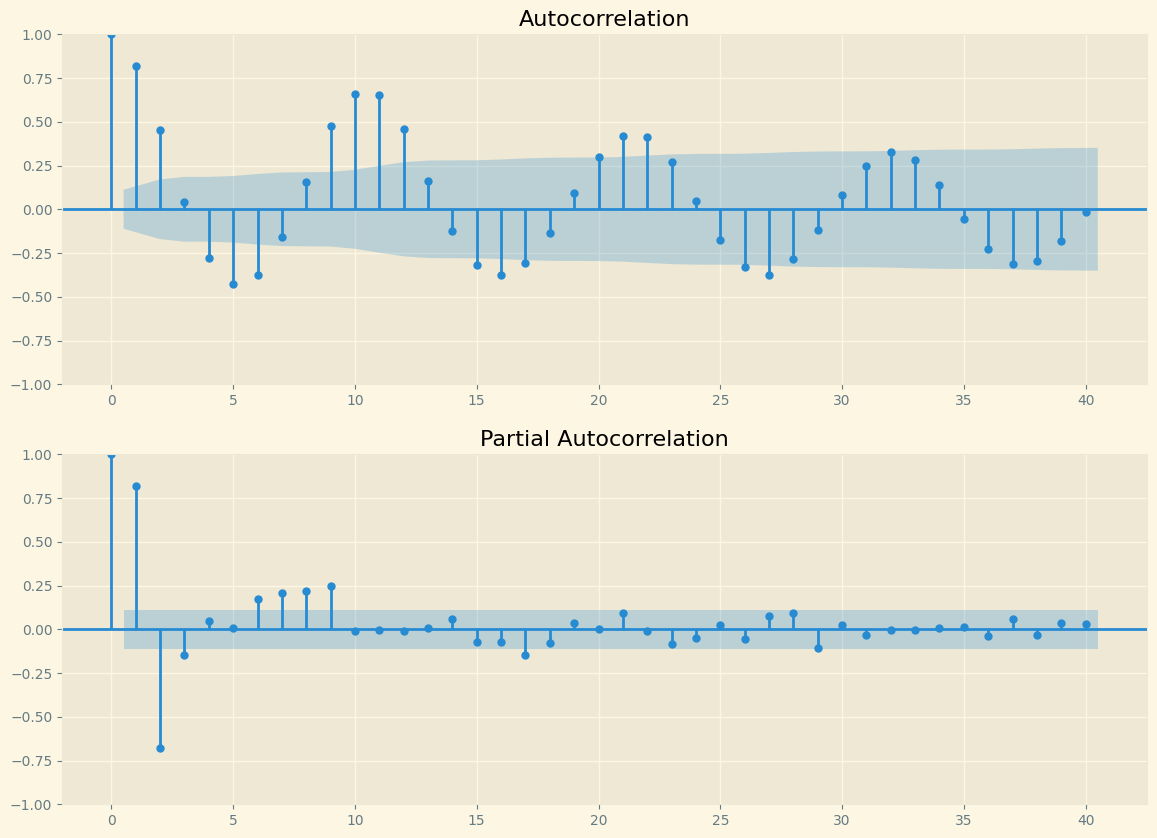

In [18]:
fig = plt.figure(figsize = (14, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags = 40, ax = ax2)

In [20]:
arma_mod20 = ARIMA(dta, order = (2,0,0)).fit()
print(arma_mod20.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727181
dtype: float64


In [21]:
arma_mod30 = ARIMA(dta, order = (3,0,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)

2622.6370933008184 2637.570458408409 2628.6074811460644


In [22]:
print(arma_mod30.params)

const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64


In [23]:
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)

2619.4036292456467 2638.0703356301356 2626.866614052204


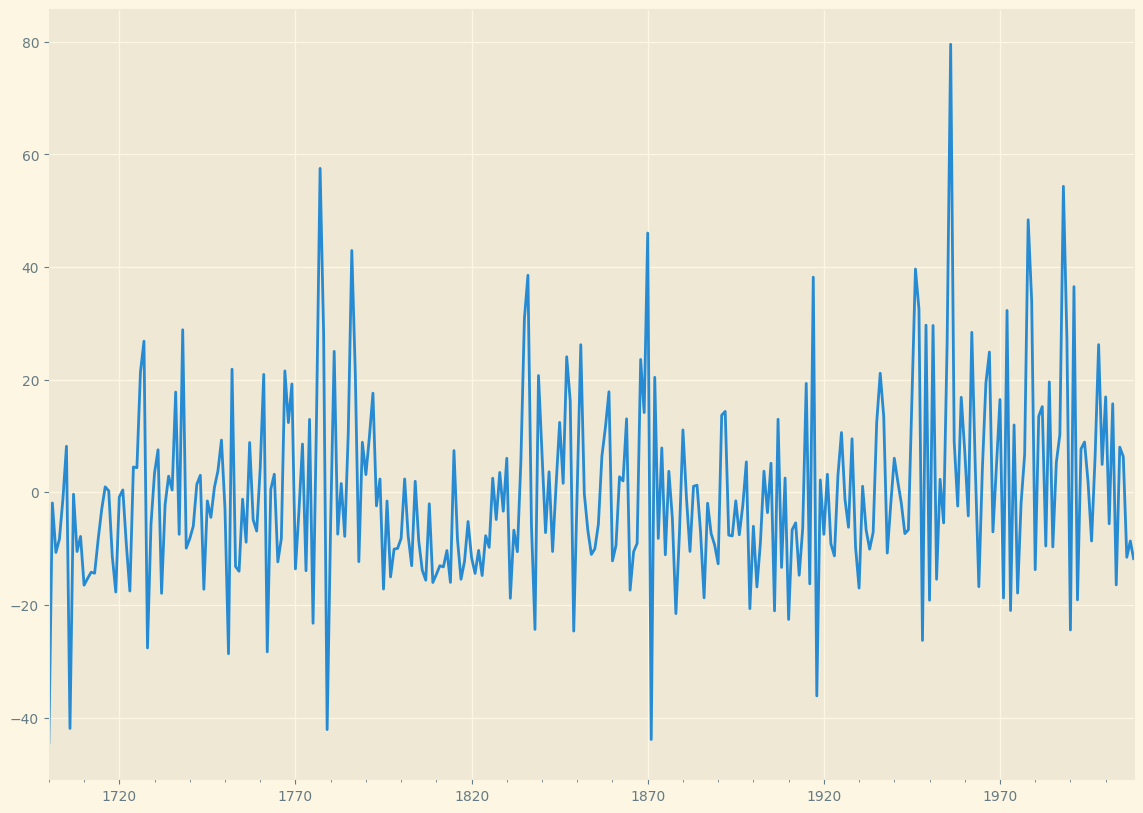

In [24]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax = ax)

In [25]:
resid = arma_mod30.resid
stats.normaltest(resid)

NormaltestResult(statistic=49.84393222352858, pvalue=1.5015079620686466e-11)

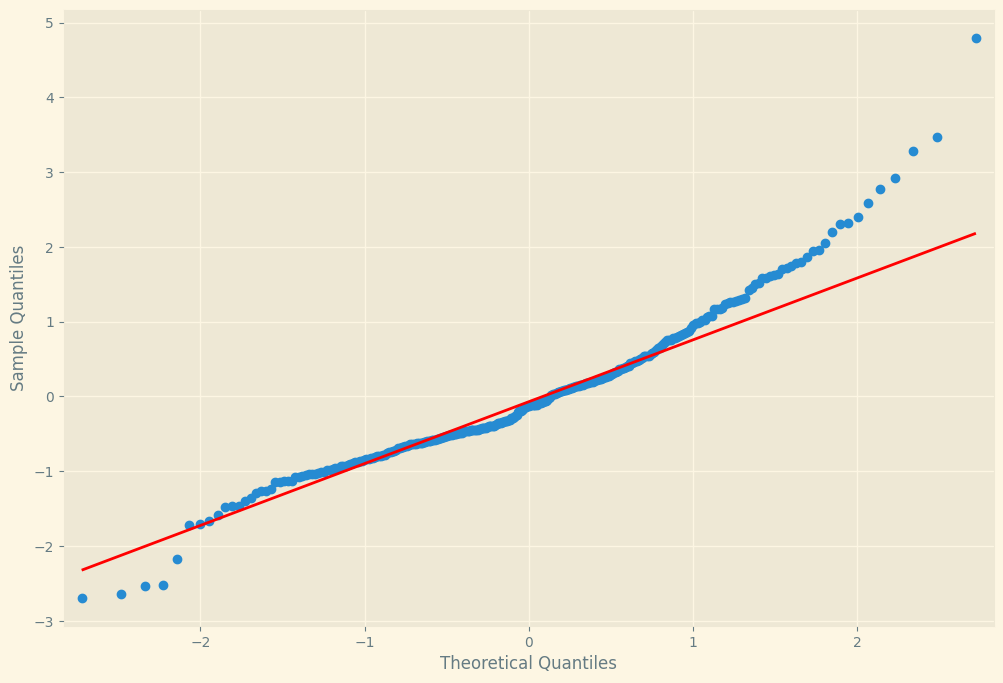

In [26]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid,line="q", ax= ax ,fit= True)

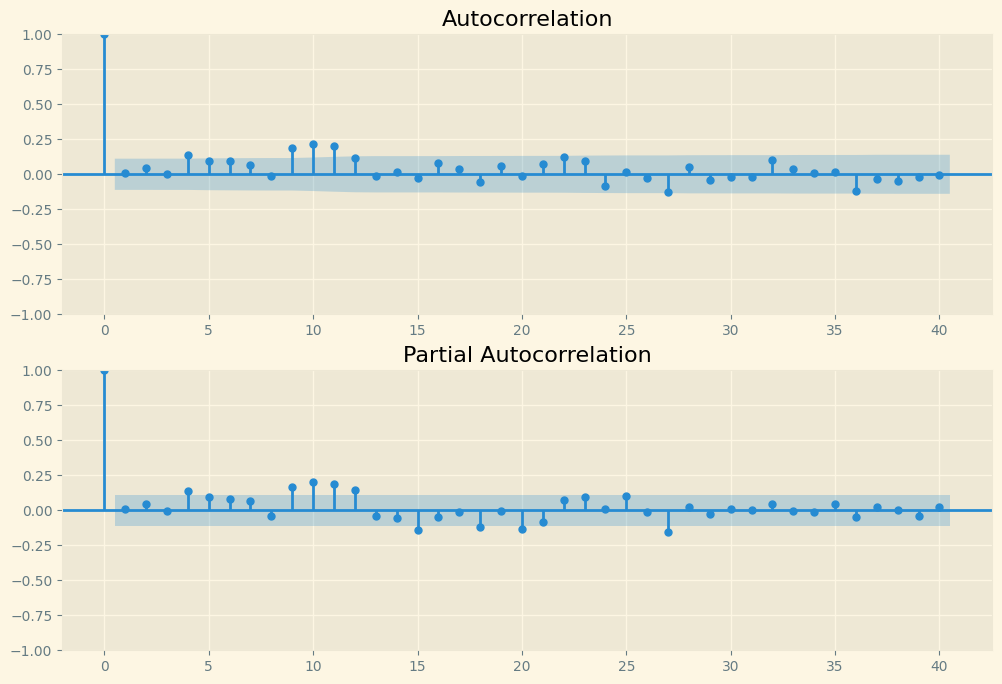

In [28]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid,lags=40,ax=ax2)

In [34]:
 import numpy as np  
 import statsmodels.api as sm  
   
 # Compute autocorrelation coefficients and statistics for the residuals  
 r, q, p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)  
   
 # Create lag values that match the length of r (excluding lag 0)  
 lags = np.arange(1, len(r))  
 # Ensure that q and p have the same length as lags (usually they are computed for lags > 0)  
 data = np.c_[lags, r[1:], q, p]  
   
 print("Data shape:", data.shape)  
 print("First few rows of data:")  
 print(data[:5])  

Data shape: (24, 4)
First few rows of data:
[[ 1.00000000e+00  9.17040130e-03  2.62388522e-02  8.71318366e-01]
 [ 2.00000000e+00  4.17927927e-02  5.72981912e-01  7.50893870e-01]
 [ 3.00000000e+00 -1.33812946e-03  5.73544245e-01  9.02461192e-01]
 [ 4.00000000e+00  1.36086343e-01  6.40864171e+00  1.70638485e-01]
 [ 5.00000000e+00  9.24649305e-02  9.11135128e+00  1.04704310e-01]]


In [35]:
predict_sunspots = arma_mod30.predict("1990", "2012", dynamic =True)
print(predict_sunspots)

1990-12-31    167.048337
1991-12-31    140.995022
1992-12-31     94.862115
1993-12-31     46.864439
1994-12-31     11.246106
1995-12-31     -4.718265
1996-12-31     -1.164628
1997-12-31     16.187246
1998-12-31     39.022948
1999-12-31     59.450799
2000-12-31     72.171269
2001-12-31     75.378329
2002-12-31     70.438480
2003-12-31     60.733987
2004-12-31     50.204383
2005-12-31     42.078584
2006-12-31     38.116648
2007-12-31     38.456730
2008-12-31     41.965644
2009-12-31     46.870948
2010-12-31     51.424877
2011-12-31     54.401403
2012-12-31     55.323515
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [36]:
def mean_forecast_err(y,yhat):
    return y.sub(yhat).mean()

In [37]:
mean_forecast_err(dta.SUNACTIVITY,predict_sunspots)

5.634833002279541